In [ ]:
# use fsnippets to find permit location based on lat and long
    # column names: latitude, longitude
    # filter when none given
# calculate activity in neighborhood by adding together square footage contaminated
    # column name: square feet
    #filter when none given

{'South Shore': 1248746.0, 'Central Business District': 3897629.0, 'Shadyside': 263630.0, 'Squirrel Hill South': 354530.0, 'Middle Hill': 70502.0, 'Homewood North': 230041.0, 'Hazelwood': 191416.0, 'Perry South': 40046.0, 'Lower Lawrenceville': 99576.0, 'Sheraden': 65946.0, 'Stanton Heights': 6096.0, 'Allentown': 38782.0, 'Bluff': 843500.0, 'Central Oakland': 625401.0, 'Greenfield': 50811.0, 'Fineview': 86718.0, 'North Oakland': 636634.0, 'Knoxville': 47087.0, 'Squirrel Hill North': 233275.0, 'South Oakland': 118225.0, 'West Oakland': 1647092.0, 'Bloomfield': 382138.0, 'Mount Washington': 94535.0, 'Allegheny Center': 214943.0, 'East Allegheny': 61515.0, 'Ridgemont': 235404.0, 'South Side Flats': 241419.0, 'Chateau': 58253.0, 'Overbrook': 78303.0, 'Strip District': 151405.0, 'Central Lawrenceville': 126700.0, 'Brighton Heights': 217614.0, 'Crafton Heights': 68177.0, 'Terrace Village': 21792.0, 'East Liberty': 1880037.0, 'California-Kirkbride': 58958.0, 'Point Breeze': 80921.0, 'Northvie

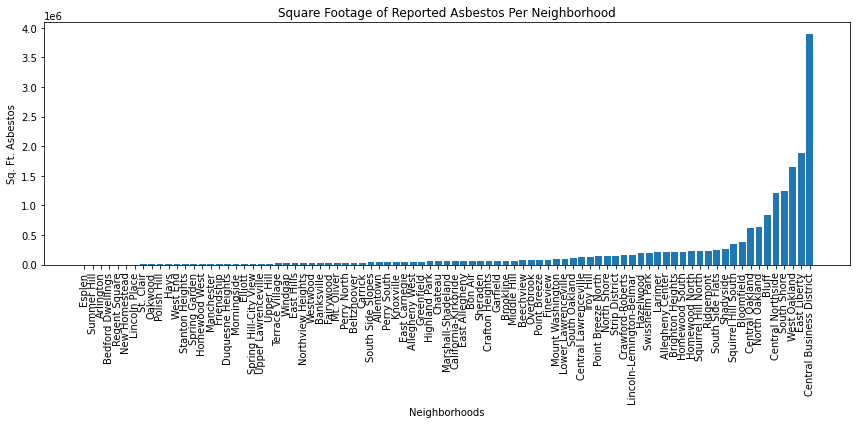

In [43]:
#imports
import pandas as pd
import fpsnippets
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

#importing relevant columns
asb = pd.read_csv("asbestos_dataset.csv", usecols = ['city', 'square_feet', 'latitude','longitude'])

#filtering out no given lat and long
asb = asb[~asb.latitude.isnull()]

#filtering out no given square feet
asb = asb[~asb.square_feet.isnull()]

#make a 2D array of neighborhoods and square footage of asbestos?
nghDict = dict()
#filtering out not in a pittsburgh neighborhood

for index, row in asb.iterrows():
    #determine neighborhood of latitude and longitude
    lat = row['latitude']
    long = row['longitude']
    neighborhood = fpsnippets.geo_to_neighborhood(lat,long)

    #parse neighborhoods and associated square footage of asbestos with them
    if neighborhood is not None:
        if neighborhood in nghDict:
            nghDict[neighborhood] += row['square_feet']
        else:
            #add new entry
            nghDict[neighborhood] = row['square_feet']
    
print(nghDict)
sorted_nghDict = dict(sorted(nghDict.items(), key=lambda item: item[1]))
nghDF = pd.Series(sorted_nghDict).to_frame()

print(nghDF)
#plot it using matplotlib
plt.figure(figsize=(12, 6)) 
plt.bar(nghDF.index, nghDF[0])  # Assuming the index represents the x-axis values
plt.xlabel('Neighborhoods')  
plt.ylabel('Sq. Ft. Asbestos')  
plt.title('Square Footage of Reported Asbestos Per Neighborhood') 
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()
#make geopandas heat map
